--- INSTALASI SERPAPI & TEXTBLOB ---

In [ ]:
print(" Menginstal library SerpApi...")
!pip install google-search-results -q
!pip install textblob -q
!python -m textblob.download_corpora -q
!pip install pandas scikit-learn sastrawi nltk wordcloud matplotlib seaborn -q

 Menginstal library SerpApi...
  Preparing metadata (setup.py) ... done
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 12.0 MB/s eta 0:00:00


--- LIBRARY ---

In [ ]:
import pandas as pd
from google.colab import drive
from serpapi import GoogleSearch
from textblob import TextBlob
from google.colab import userdata
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string

--- API KEY ---

In [ ]:
print(" Menyiapkan API Key...")
try:
    API_KEY = userdata.get('API')
except userdata.SecretNotFoundError:
    raise ValueError("API Key tidak ditemukan.")

 Menyiapkan API Key...


--- INISIALISASI ---

In [ ]:
# Download resource NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Persiapan untuk stemming Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Persiapan stopword Bahasa Indonesia
kamus_stopword = stopwords.words('indonesian')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


--- ID TARGET (TARGET SCARAPING) ---

In [ ]:
target_data_id = "0x2e7a59e60f698d37:0x22694dc76729e0b5" # Data ID Target
nama_file_output = "semua_ulasan_serpapi.csv"
print(f" Target data_id: {target_data_id}")

 Target data_id: 0x2e7a59e60f698d37:0x22694dc76729e0b5


--- MULAI SCARAPING ---

In [ ]:
print("\n Melakukan permintaan awal ke SerpApi...")
params = {
    "engine": "google_maps_reviews",
    "data_id": target_data_id,
    "api_key": API_KEY,
    "lang": "id"
}

search = GoogleSearch(params)
results = search.get_dict()

# Inisialisasi list untuk menampung semua ulasan
all_reviews = []

# Cek apakah ada pesan error dari SerpApi sebelum melanjutkan
if "error" in results:
    print(f"\n TERJADI ERROR DARI SERPAPI: {results['error']}")
    print("   -> Pastikan 'data_id' sudah benar dan API Key Anda valid/memiliki kuota.")
else:
    # Jika tidak ada error, baru lanjutkan proses looping (paginasi)
    print(" Permintaan awal berhasil, memulai pengambilan ulasan...")
    page_num = 0

    # Loop ini akan otomatis mengikuti "halaman berikutnya" sampai semua ulasan habis
    while True:
        page_num += 1
        reviews_page = results.get("reviews", [])

        # Kondisi jika halaman pertama kosong meskipun tidak ada error
        if not reviews_page and page_num == 1:
            print("   -> Lokasi ditemukan, namun tidak memiliki ulasan.")
            break

        if not reviews_page:
            print(" Tidak ada ulasan lagi di halaman berikutnya.")
            break

        all_reviews.extend(reviews_page)
        print(f"  -> Halaman {page_num}: Mendapatkan {len(reviews_page)} ulasan. Total sejauh ini: {len(all_reviews)}")

        # Cek apakah ada halaman berikutnya
        if "next_page_token" not in results.get("serpapi_pagination", {}):
            print(" Semua halaman ulasan telah berhasil di-scrape.")
            break

        # Pindah ke halaman berikutnya
        params["next_page_token"] = results.get("serpapi_pagination", {}).get("next_page_token")
        search = GoogleSearch(params)
        results = search.get_dict()


 Melakukan permintaan awal ke SerpApi...
 Permintaan awal berhasil, memulai pengambilan ulasan...
  -> Halaman 1: Mendapatkan 8 ulasan. Total sejauh ini: 8
  -> Halaman 2: Mendapatkan 10 ulasan. Total sejauh ini: 18
  -> Halaman 3: Mendapatkan 10 ulasan. Total sejauh ini: 28
  -> Halaman 4: Mendapatkan 10 ulasan. Total sejauh ini: 38
  -> Halaman 5: Mendapatkan 10 ulasan. Total sejauh ini: 48
  -> Halaman 6: Mendapatkan 10 ulasan. Total sejauh ini: 58
  -> Halaman 7: Mendapatkan 10 ulasan. Total sejauh ini: 68
  -> Halaman 8: Mendapatkan 10 ulasan. Total sejauh ini: 78
  -> Halaman 9: Mendapatkan 10 ulasan. Total sejauh ini: 88
  -> Halaman 10: Mendapatkan 10 ulasan. Total sejauh ini: 98
  -> Halaman 11: Mendapatkan 10 ulasan. Total sejauh ini: 108
  -> Halaman 12: Mendapatkan 10 ulasan. Total sejauh ini: 118
  -> Halaman 13: Mendapatkan 10 ulasan. Total sejauh ini: 128
  -> Halaman 14: Mendapatkan 10 ulasan. Total sejauh ini: 138
  -> Halaman 15: Mendapatkan 10 ulasan. Total sejauh i

--- REVIEW SCARPING & SAVE HASIL SCARPING ---

In [ ]:
if all_reviews:
    print("\n Membersihkan dan memformat data ulasan...")

    # Buat list baru untuk menampung data yang sudah bersih
    cleaned_reviews_list = []
    for review in all_reviews:
        cleaned_reviews_list.append({
            'nama_penulis': review.get('user', {}).get('name'), # Akses nama dengan aman
            'rating': review.get('rating'),
            'teks_ulasan': review.get('snippet'),
            'waktu': review.get('date'),
            'likes': review.get('likes', 0)
        })

    # Buat DataFrame dari list yang sudah bersih
    df_final = pd.DataFrame(cleaned_reviews_list)

    # Simpan ke Colab
    df_final.to_csv(nama_file_output, index=False, encoding='utf-8-sig')
    print(f"\n SUKSES! {len(all_reviews)} ulasan telah disimpan dalam file '{nama_file_output}'")

    # Simpan ke Google Drive jika sudah di-mount
    try:
        drive.mount('/content/drive', force_remount=True)
        path_di_drive = f"/content/drive/MyDrive/{nama_file_output}"
        df_final.to_csv(path_di_drive, index=False, encoding='utf-8-sig')
        print(f" SUKSES! Data juga telah disimpan di Google Drive di lokasi: {path_di_drive}")
    except Exception as e:
        print(f"\n Gagal menyimpan ke Google Drive. Error: {e}")

    print("\nBerikut adalah 5 baris pertama data:")
    print(df_final.head())
else:
    print("\n Tidak ada ulasan yang ditemukan atau terjadi kesalahan pada proses sebelumnya.")



 Membersihkan dan memformat data ulasan...

 SUKSES! 1529 ulasan telah disimpan dalam file 'semua_ulasan_serpapi.csv'
Mounted at /content/drive
 SUKSES! Data juga telah disimpan di Google Drive di lokasi: /content/drive/MyDrive/semua_ulasan_serpapi.csv

Berikut adalah 5 baris pertama data:
        nama_penulis  rating  \
0            yussron     5.0   
1      Bayu Prasetyo     5.0   
2       Galuh Astika     5.0   
3       Gayuh Amukti     5.0   
4  SatriaDarma23 070     5.0   

                                         teks_ulasan         waktu  likes  
0  Recommended to find second laptop like new and...   a month ago      0  
1          Second laptop recomended secon like a new  3 months ago      0  
2                                                  👍  2 months ago      0  
3                                     Recommended 👍🏼  2 months ago      0  
4  Recommend for all who want to buy newest lapto...   2 years ago      0  


--- MENAMBAHKAN SENTIMEN ---

In [ ]:
path_file_input = "/content/semua_ulasan_serpapi.csv"
nama_kolom_ulasan = 'teks_ulasan'
nama_file_output = 'hasil_ulasan_dengan_sentimen.csv'

print(f"\n Membaca file: {path_file_input}")

try:
    # Baca file CSV ke dalam DataFrame
    df = pd.read_csv(path_file_input)

    # Fungsi untuk analisis sentimen (Case Holding)
    def analisis_sentimen(teks):
        # Memastikan input adalah string
        if not isinstance(teks, str):
            return "Netral"

        # Analisis polaritas. Skor > 0.1 adalah positif, < -0.1 adalah negatif.
        if TextBlob(teks).sentiment.polarity > 0.1:
            return "Positif"
        elif TextBlob(teks).sentiment.polarity < -0.1:
            return "Negatif"
        else:
            return "Netral"

    print(f" Menerapkan analisis sentimen pada kolom '{nama_kolom_ulasan}'...")

    # Terapkan fungsi ke kolom ulasan dan buat kolom baru
    df['case_holding_sentimen'] = df[nama_kolom_ulasan].apply(analisis_sentimen)

    print(" Analisis sentimen selesai.")
    print("\n Berikut adalah 5 baris pertama data dengan kolom baru:")
    print(df.head())

    # Simpan DataFrame yang sudah diperbarui ke file CSV baru
    df.to_csv(nama_file_output, index=False, encoding='utf-8-sig')
    print(f"\n SUKSES! File baru telah disimpan dengan nama '{nama_file_output}'")

    #  Simpan juga hasilnya ke Google Drive
    try:
        drive.mount('/content/drive', force_remount=True)
        path_di_drive = f"/content/drive/MyDrive/{nama_file_output}"
        df_final.to_csv(path_di_drive, index=False, encoding='utf-8-sig')
        print(f" SUKSES! Data juga telah disimpan di Google Drive di lokasi: {path_di_drive}")
    except Exception as e:
        print(f"\n Gagal menyimpan ke Google Drive. Error: {e}")

except FileNotFoundError:
    print(f" ERROR: File '{path_file_input}' tidak ditemukan! Pastikan nama file sudah benar dan file sudah di-upload.")
except KeyError:
    print(f" ERROR: Kolom '{nama_kolom_ulasan}' tidak ditemukan di dalam file CSV! Periksa kembali nama kolom.")



 Membaca file: /content/semua_ulasan_serpapi.csv
 Menerapkan analisis sentimen pada kolom 'teks_ulasan'...
 Analisis sentimen selesai.

 Berikut adalah 5 baris pertama data dengan kolom baru:
        nama_penulis  rating  \
0            yussron     5.0   
1      Bayu Prasetyo     5.0   
2       Galuh Astika     5.0   
3       Gayuh Amukti     5.0   
4  SatriaDarma23 070     5.0   

                                         teks_ulasan         waktu  likes  \
0  Recommended to find second laptop like new and...   a month ago      0   
1          Second laptop recomended secon like a new  3 months ago      0   
2                                                  👍  2 months ago      0   
3                                     Recommended 👍🏼  2 months ago      0   
4  Recommend for all who want to buy newest lapto...   2 years ago      0   

  case_holding_sentimen  
0               Positif  
1                Netral  
2                Netral  
3                Netral  
4                Netr

MEMUAT & MELABELI DATA

In [ ]:
print(" Memuat & Melabeli Data...")

nama_file_input = '/content/hasil_ulasan_dengan_sentimen.csv'

try:
    df = pd.read_csv(nama_file_input)
    # Hapus baris yang tidak memiliki ulasan
    df.dropna(subset=['teks_ulasan'], inplace=True)
except FileNotFoundError:
    print(f" ERROR: File '{nama_file_input}' tidak ditemukan!")
    # Hentikan eksekusi jika file tidak ada
    exit()

# --- PELABELAN (LABELING) ---
# Membuat label sentimen berdasarkan kolom 'rating'
def buat_label(rating):
    if rating >= 4:
        return 'Positif'
    elif rating <= 2:
        return 'Negatif'
    else:
        return 'Netral'

df['sentimen'] = df['rating'].apply(buat_label)
print(" Pelabelan data berdasarkan rating selesai.")

 Memuat & Melabeli Data...
 Pelabelan data berdasarkan rating selesai.


--- PREPROCESSING TEKS ---

In [ ]:
print("\n 2. Memulai Preprocessing Teks (Normalisasi, Tokenisasi, Stopword, Stemming)...")

def preprocess_text(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # HAPUS URL (JIKA ADA)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # HAPUS TANDA BACA & ANGKA ---
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)

    # NORMALISASI (LOWERCASE) ---
    text = text.lower()

    #  TOKENISASI ---
    tokens = word_tokenize(text)

    #  STOPWORD REMOVAL ---
    tokens_tanpa_stopword = [word for word in tokens if word not in kamus_stopword]

    #  STEMMING ---
    tokens_stemmed = [stemmer.stem(word) for word in tokens_tanpa_stopword]

    # Gabungkan kembali menjadi string
    return " ".join(tokens_stemmed)

# Terapkan fungsi preprocessing ke kolom ulasan
df['ulasan_bersih'] = df['teks_ulasan'].apply(preprocess_text)
print(" Preprocessing teks selesai.")
print("\nContoh hasil preprocessing:")
print("Teks Asli:", df['teks_ulasan'].iloc[0])
print("Teks Bersih:", df['ulasan_bersih'].iloc[0])

# --- Menyimpan Hasil Preprocessing ke CSV ---
nama_file_preprocessing = 'hasil_preprocessing.csv'
print(f"\n Menyimpan data setelah preprocessing ke file '{nama_file_preprocessing}'...")
df.to_csv(nama_file_preprocessing, index=False, encoding='utf-8-sig')
print(" Data berhasil disimpan.")


 2. Memulai Preprocessing Teks (Normalisasi, Tokenisasi, Stopword, Stemming)...
 Preprocessing teks selesai.

Contoh hasil preprocessing:
Teks Asli: Recommended to find second laptop like new and good condition
Teks Bersih: recommended to find second laptop like new and good condition

 Menyimpan data setelah preprocessing ke file 'hasil_preprocessing.csv'...
 Data berhasil disimpan.


--- MODEL ANALISIS (MACHINE LEARNING) ---

In [ ]:
print("\n Membangun Model Analisis...")

# Konversi teks menjadi vektor numerik dengan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['ulasan_bersih'])
y = df['sentimen']

# Bagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Latih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
print(" Model Naive Bayes berhasil dilatih.")


 Membangun Model Analisis...
 Model Naive Bayes berhasil dilatih.


--- EVALUASI ---


 Mengevaluasi Kinerja Model...
Akurasi Model: 99.48%

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         1
     Positif       0.99      1.00      1.00       193

    accuracy                           0.99       194
   macro avg       0.50      0.50      0.50       194
weighted avg       0.99      0.99      0.99       194


Confusion Matrix:


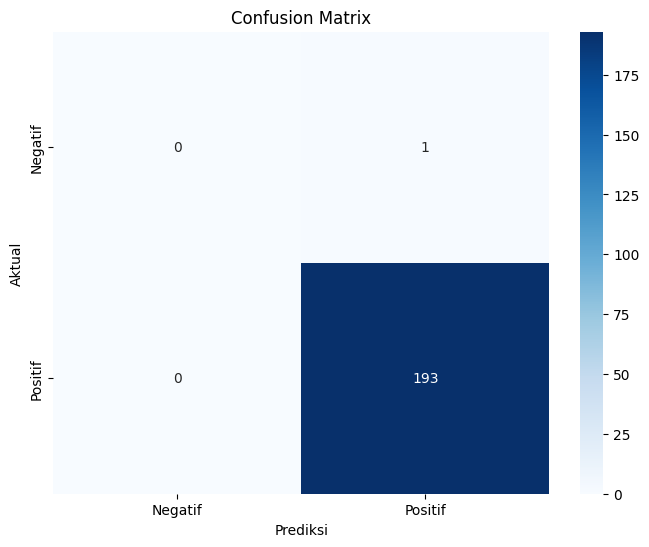

In [ ]:
print("\n Mengevaluasi Kinerja Model...")
y_pred = model.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Laporan Klasifikasi (Precision, Recall, F1-Score)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


 Membuat Visualisasi Data...


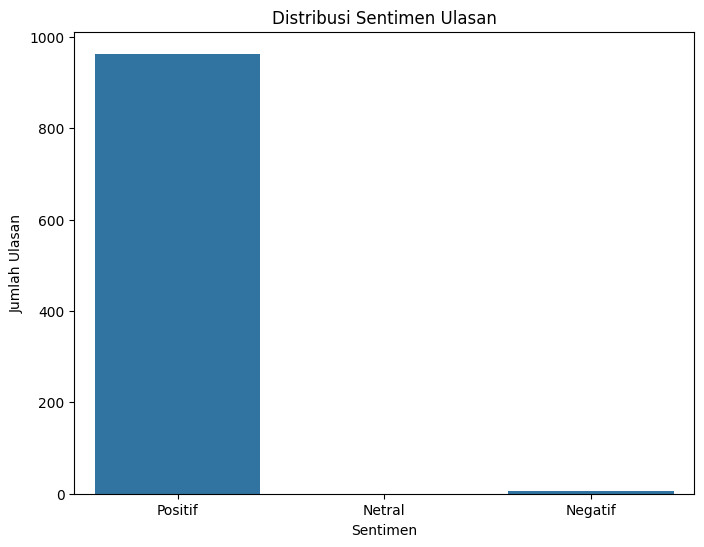

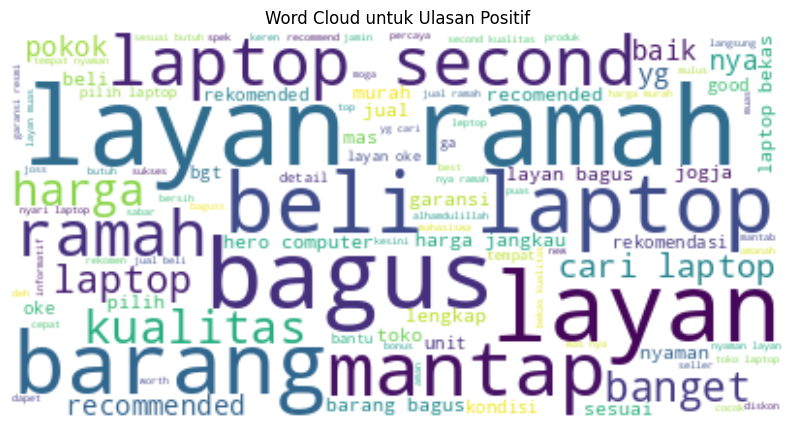

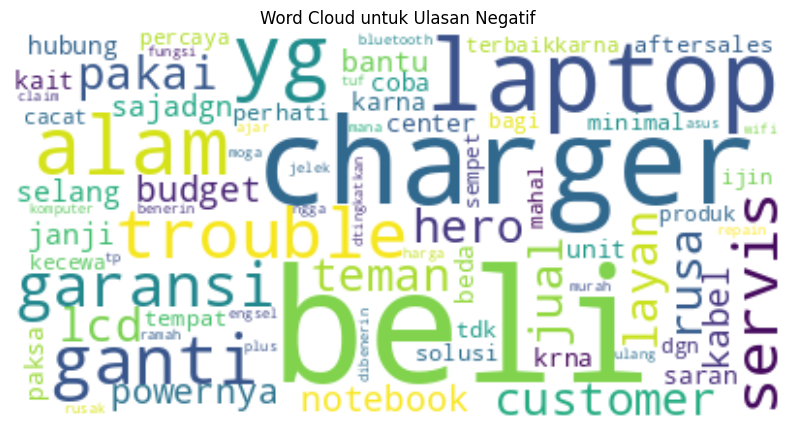

In [ ]:
print("\n Membuat Visualisasi Data...")

# Visualisasi Distribusi Sentimen
plt.figure(figsize=(8, 6))
sns.countplot(x='sentimen', data=df, order=['Positif', 'Netral', 'Negatif'])
plt.title('Distribusi Sentimen Ulasan')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

# Visualisasi Word Cloud
def buat_wordcloud(kategori_sentimen):
    teks = " ".join(review for review in df[df['sentimen'] == kategori_sentimen]['ulasan_bersih'])
    if len(teks) > 0:
        wordcloud = WordCloud(background_color="white", colormap='viridis', max_words=100).generate(teks)
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Word Cloud untuk Ulasan {kategori_sentimen}')
        plt.show()

# Buat Word Cloud untuk setiap sentimen
buat_wordcloud('Positif')
buat_wordcloud('Negatif')
